#### Input

In [21]:
%load_ext autoreload
%matplotlib inline
%load_ext nb_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [22]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

from helpers import helpplots as plothelp
from helpers import helpfunction as helper
from helpers import plot_dicts

<IPython.core.display.Javascript object>

In [23]:
%autoreload

<IPython.core.display.Javascript object>

### Constants

In [24]:
run = 1
input_dir = "./input/15Nov/run{}/".format(run)
output_dir = "./output/run{}/".format(run)

<IPython.core.display.Javascript object>

In [25]:
%%time
data = pickle.load(open(input_dir+"samples.pckl", 'rb'))
samples = list(data.keys())

CPU times: user 666 ms, sys: 1.57 s, total: 2.24 s
Wall time: 3.86 s


<IPython.core.display.Javascript object>

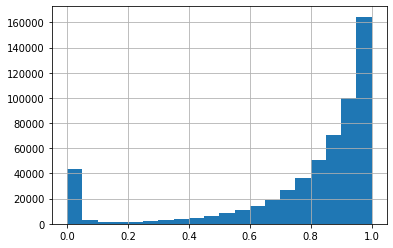

<IPython.core.display.Javascript object>

In [26]:
data["nu"]["daughters"]["nu_completeness_from_pfp"].hist(bins=20, range=(0, 1))

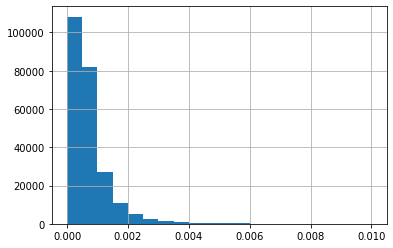

<IPython.core.display.Javascript object>

In [27]:
data["nue"]["daughters"]["nu_purity_from_pfp"].hist(bins=20, range=(0, 0.01))

In [28]:
# Add the category cosmic:
for s in samples:
    if s not in helper.data_samples:
        cosmic = (data[s]["daughters"]["nu_completeness_from_pfp"] < 0.2) & (
            data[s]["daughters"]["category"] != 5
        )
        data[s]["daughters"].loc[cosmic, "category"] = 4

<IPython.core.display.Javascript object>

In [29]:
nue_frame = data["nue"]["daughters"]
nue_mc = data["nue"]["mc"]
nue_frame.rename(columns={"selected": "preselection_roberto"}, inplace=True)

<IPython.core.display.Javascript object>

In [30]:
title_str = "MicroBooNE Run{}: {:.1e} POT".format(run, data["on"]["pot"])

<IPython.core.display.Javascript object>

### Evaluation

In [31]:
q_s = "(select & e_candidate)"

<IPython.core.display.Javascript object>

In [32]:
print(nue_frame.query(q_s)["category"].value_counts())
print()
print(nue_frame.query(q_s)["interaction"].value_counts())

11    8490
1     3752
10    1643
5      189
4        1
Name: category, dtype: int64

0     7035
1     4236
10    1642
2     1136
3       26
Name: interaction, dtype: int64


<IPython.core.display.Javascript object>

In [33]:
print(pd.Series(nue_mc["category"]).value_counts())
print()
print(pd.Series(nue_mc["interaction"]).value_counts())
print()
print(pd.Series(nue_mc["true_category"]).value_counts())

11    28527
1     24320
0     18467
5     11503
10     6454
3         8
31        6
dtype: int64

0     34339
1     32710
2     12732
10     9190
3       314
dtype: int64

2    36667
3    30548
6    13448
1     8590
4       28
5        4
dtype: int64


<IPython.core.display.Javascript object>

### Plots

#### Signal sample plots

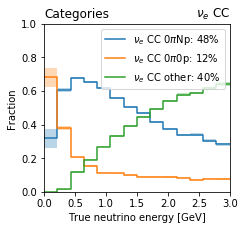

<IPython.core.display.Javascript object>

In [34]:
cats = {2: 11, 1: 10, 3: 1}
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15

fig, ax = plt.subplots(ncols=1, figsize=(3.5, 3.3))

for cat in cats.keys():
    den = nue_mc[field][data["nue"]["mc"]["nueccinc"] == True]
    num = nue_mc[field][data["nue"]["mc"]["true_category"] == cat]

    den_w = nue_mc["weightSpline"][nue_mc["nueccinc"] == True]
    num_w = nue_mc["weightSpline"][nue_mc["true_category"] == cat]

    eff, unc_low, unc_up, edges = plothelp.efficiency_post(
        num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
    )
    ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
    ax.step(
        edges,
        eff,
        where="post",
        label="{0:<13}: {1:.0f}%".format(
            plot_dicts.category_labels[cats[cat]], sum(num_w) / sum(den_w) * 100
        ),
    )
ax.set_title(r"$\nu_e$ CC", loc="right")
ax.set_title("Categories", loc="left")
ax.set_xlabel("True neutrino energy [GeV]")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 1)
ax.set_xlim(x_min, x_max)
ax.legend(loc="upper right")

fig.tight_layout()

fig.savefig(output_dir + "truth_cat.pdf", bbox_inches="tight")

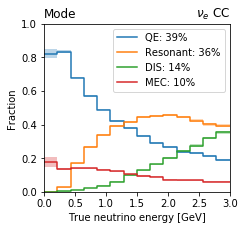

<IPython.core.display.Javascript object>

In [35]:
cats = [0, 1, 2, 10]
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15

fig, ax = plt.subplots(ncols=1, figsize=(3.5, 3.3))

for cat in cats:
    den = nue_mc[field]
    num = nue_mc[field][nue_mc["interaction"] == cat]

    den_w = nue_mc["weightSpline"]
    num_w = nue_mc["weightSpline"][nue_mc["interaction"] == cat]

    eff, unc_low, unc_up, edges = plothelp.efficiency_post(
        num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
    )
    ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
    ax.step(
        edges,
        eff,
        where="post",
        label="{0}: {1:.0f}%".format(
            plot_dicts.int_labels[cat], sum(num_w) / sum(den_w) * 100
        ),
    )
ax.set_title(r"$\nu_e$ CC", loc="right")
ax.set_title("Mode", loc="left")
ax.set_xlabel("True neutrino energy [GeV]")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 1)
ax.set_xlim(x_min, x_max)
ax.legend(loc="upper right")

fig.tight_layout()

fig.savefig(output_dir + "truth_int.pdf", bbox_inches="tight")

/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:61: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.1%
Purity: 1.9%
Purity: 38.5%


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:61: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.1%
Purity: 1.9%
Purity: 38.5%


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:61: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.1%
Purity: 1.9%
Purity: 38.5%


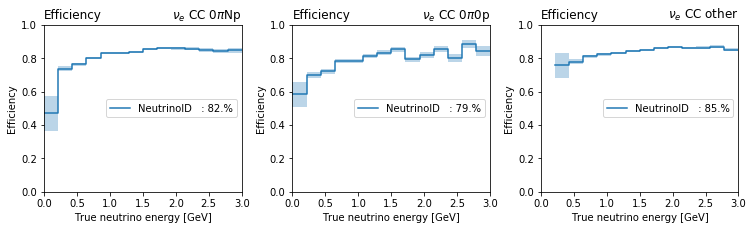

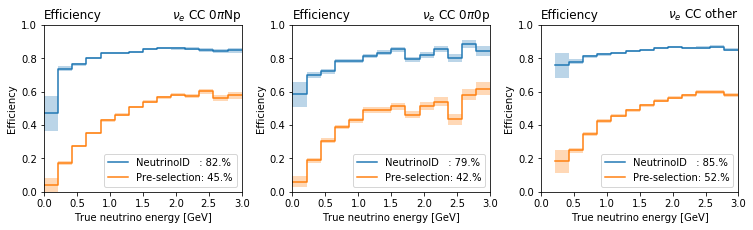

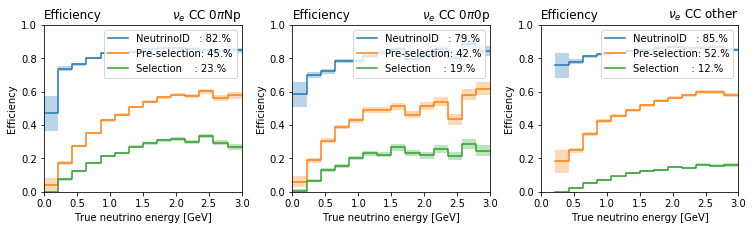

<IPython.core.display.Javascript object>

In [36]:
# eff per cat
cats = {2: 11, 1: 10, 3: 1}
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15
selectors = [
    "n_pfps>0 & daughter==0",
    "e_candidate & preselect",
    "e_candidate & select",
]  # q_s
labs = ["NeutrinoID", "Pre-selection", "Selection"]

for i in range(3):
    fig, axes = plt.subplots(ncols=3, figsize=(10.5, 3.3))

    for cat, ax in zip(cats.keys(), axes):
        for selector, lab in zip(selectors[: (i + 1)], labs):
            num = nue_frame.query(selector).query("truth_cat==@cat")[field]
            den = nue_mc[field][nue_mc["true_category"] == cat]

            num_w = nue_frame.query(selector).query("truth_cat==@cat")["weightSpline"]
            den_w = nue_mc["weightSpline"][nue_mc["true_category"] == cat]

            eff, unc_low, unc_up, edges = plothelp.efficiency_post(
                num,
                den,
                num_w=num_w,
                den_w=den_w,
                n_bins=n_bins,
                x_min=x_min,
                x_max=x_max,
            )
            ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
            ax.step(
                edges,
                eff,
                where="post",
                label="{0:<13}: {1:#.2g}%".format(lab, sum(num_w) / sum(den_w) * 100),
            )
        ax.set_title(plot_dicts.category_labels[cats[cat]], loc="right")
        ax.set_title("Efficiency", loc="left")
        ax.set_xlabel("True neutrino energy [GeV]")
        ax.set_ylabel("Efficiency")
        ax.set_ylim(0, 1)
        ax.set_xlim(x_min, x_max)
        if i == 0:
            ax.legend(loc="center right")
        elif i == 1:
            ax.legend(loc="lower right")
        else:
            ax.legend(loc="upper right")

    fig.tight_layout()

    for selector in selectors:
        print(
            "Purity: {:.1f}%".format(
                100 * plothelp.get_purity(data, selector, cats.values())
            )
        )
    fig.savefig(output_dir + "efficiency_cat_" + str(i) + ".pdf", bbox_inches="tight")

/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:61: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


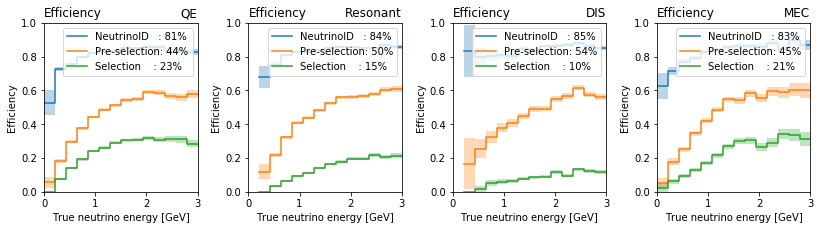

<IPython.core.display.Javascript object>

In [60]:
# eff per mode
cats = [0, 1, 2, 10]
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15
selectors = [
    "n_pfps>0 & daughter==0",
    "e_candidate & preselect",
    "e_candidate & select",
]  # q_s
labs = ["NeutrinoID", "Pre-selection", "Selection"]
fig, axes = plt.subplots(ncols=4, figsize=(11.5, 3.3))

for cat, ax in zip(cats, axes):
    for selector, lab in zip(selectors, labs):
        num = nue_frame.query(selector).query("interaction==@cat & nueccinc")[field]
        den = nue_mc[field][(nue_mc["interaction"] == cat) & nue_mc["nueccinc"] == 1]

        num_w = nue_frame.query(selector).query("interaction==@cat & nueccinc")[
            "weightSpline"
        ]
        den_w = nue_mc["weightSpline"][
            (nue_mc["interaction"] == cat) & nue_mc["nueccinc"] == 1
        ]

        eff, unc_low, unc_up, edges = plothelp.efficiency_post(
            num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
        )
        ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
        ax.step(
            edges,
            eff,
            where="post",
            label="{0:<13}: {1:.0f}%".format(lab, sum(num_w) / sum(den_w) * 100),
        )
    ax.set_title(plot_dicts.int_labels[cat], loc="right")
    ax.set_title("Efficiency", loc="left")
    ax.set_xlabel("True neutrino energy [GeV]")
    ax.set_ylabel("Efficiency")
    ax.set_ylim(0, 1)
    ax.set_xlim(x_min, x_max)
    ax.legend(loc="upper right")

fig.tight_layout()
fig.savefig(output_dir + "efficiency_int.pdf", bbox_inches="tight")

#### Nicolo Significance

In [37]:
def test_statistics_distribution_given_numbers(
    binning,
    expected_number,
    systematic_uncertainties={"nue": 0, "numu": 0, "dataext": 0, "dirt": 0},
    data_on=False,
    n_toy=10000,
    log=False,
):
    gauss = st.norm(0, 1)
    one_side_sig_percent = gauss.cdf(1) * 100

    systematic_uncertainties["nue_signal"] = systematic_uncertainties["nue"]
    systematic_uncertainties["nue_nonsignal"] = systematic_uncertainties["nue"]

    print(
        expected_number["nue"],
        expected_number["nue_signal"],
        expected_number["nue_nonsignal"],
    )

    mean_toy = {}
    poisson_toy = {}

    for sample in expected_number.keys():
        if sample == "data":
            continue

        mean_toy[sample] = np.random.normal(
            expected_number[sample],
            expected_number[sample] * systematic_uncertainties[sample],
            n_toy,
        )
        poisson_toy[sample] = np.random.poisson(mean_toy[sample])

    bkg_toy = (
        poisson_toy["numu"]
        + poisson_toy["dirt"]
        + poisson_toy["dataext"]
        + poisson_toy["nue_nonsignal"]
    )
    bkg_plus_signal_toy = bkg_toy + poisson_toy["nue_signal"]

    fig, ax = plt.subplots()
    bin_contents_total, bin_edges, _ = ax.hist(
        [bkg_plus_signal_toy, bkg_toy],
        bins=binning[0],
        range=(binning[1], binning[2]),
        density=True,
        label=["signal + background", "background only"],
        alpha=0.7,
        histtype="stepfilled",
        lw=2,
        log=log,
    )

    bin_width = (binning[2] - binning[1]) / binning[0]
    ax.set_ylabel("Probability / {:.2f}".format(bin_width))
    ax.set_xlabel("Test statistics = number of selected events")
    ymin, ymax = ax.get_ylim()

    # add expected pvalues
    percentage_values = [16, 50, 84]
    heights = {16: 0.5, 50: 0.7, 84: 0.5}
    horizontalalignments = {16: "right", 50: "center", 84: "left"}
    position_offset = {16: +10, 50: 0, 84: -10}
    expected_quantiles = np.percentile(bkg_plus_signal_toy, percentage_values)
    expected_pvalues = []
    expected_one_minus_pvalues = []
    expected_significance = []

    for percentage_value, quantile in zip(percentage_values, expected_quantiles):
        one_minus_pvalue = np.less(bkg_toy, quantile).sum() / n_toy
        pvalue = 1.0 - one_minus_pvalue
        significance = float(gauss.ppf(one_minus_pvalue))
        expected_one_minus_pvalues.append(one_minus_pvalue)
        expected_pvalues.append(pvalue)
        expected_significance.append(significance)

        plt.axvline(
            quantile,
            ymax=heights[percentage_value] - 0.1,
            color="red",
            linestyle="--",
            label="expected {}%".format(percentage_value),
        )
        plt.text(
            quantile + position_offset[percentage_value],
            heights[percentage_value] * ymax,
            "p = {:.1e}\nZ = {:.2f}".format(pvalue, significance) + r"$\sigma$",
            fontsize=10,
            verticalalignment="center",
            horizontalalignment=horizontalalignments[percentage_value],
        )

    return True

<IPython.core.display.Javascript object>

5.1 4.9 0.2


True

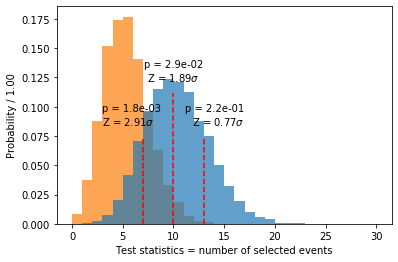

<IPython.core.display.Javascript object>

In [38]:
binning = [30, 0, 30]  # nbins, min, max

# just guess something
expected_numbers = {
    "nue": 5.1,
    "numu": 3.3,
    "dirt": 0.1,
    "dataext": 1.3,
    "data": 9,
    "nue_signal": 4.9,
    "nue_nonsignal": 0.2,
}

test_statistics_distribution_given_numbers(
    binning, expected_numbers, data_on=False, n_toy=10000, log=False
)

#### Data/MC comparison

MC category: $\nu_e$ CC other: 2.7 	#entries 48
MC category: $\nu_e$ CC 0$\pi$0p: 1.3 	#entries 22
MC category: $\nu_e$ CC 0$\pi$Np: 7.4 	#entries 129
MC category: $\nu_{\mu}$ CC other: 3.4 	#entries 59
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 1.4 	#entries 25
MC category: $\nu$ NC: 1.2 	#entries 21
MC category: $\nu$ NC $\pi^{0}$: 2.8 	#entries 50
MC category: Cosmic: 0.9 	#entries 15
MC category: Out of FV: 2.3 	#entries 40


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 0.14
CPU times: user 3.41 s, sys: 50.7 ms, total: 3.46 s
Wall time: 2.13 s


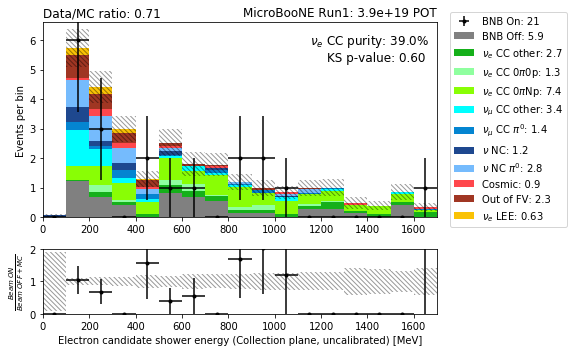

<IPython.core.display.Javascript object>

In [43]:
%%time
%autoreload
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(5 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio,purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "shr_energy_y_v",
    "Electron candidate shower energy (Collection plane, uncalibrated) [MeV]",
    N_bins=17,
    x_min=0,
    x_max=1700,
    query=q_s,
    legend=True,
    title_str=title_str,
    kind="event_category",
    y_max_scaler=1.1
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

#ax[0].set_ylim(0, 0.3)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_shower_energy_y.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 2.7 	#entries 48
MC category: $\nu_e$ CC 0$\pi$0p: 1.3 	#entries 22
MC category: $\nu_e$ CC 0$\pi$Np: 7.4 	#entries 129
MC category: $\nu_{\mu}$ CC other: 3.4 	#entries 59
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 1.4 	#entries 25
MC category: $\nu$ NC: 1.2 	#entries 21
MC category: $\nu$ NC $\pi^{0}$: 2.8 	#entries 50
MC category: Cosmic: 0.9 	#entries 15
MC category: Out of FV: 2.3 	#entries 40


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 0.14
CPU times: user 3.13 s, sys: 40.6 ms, total: 3.17 s
Wall time: 1.92 s


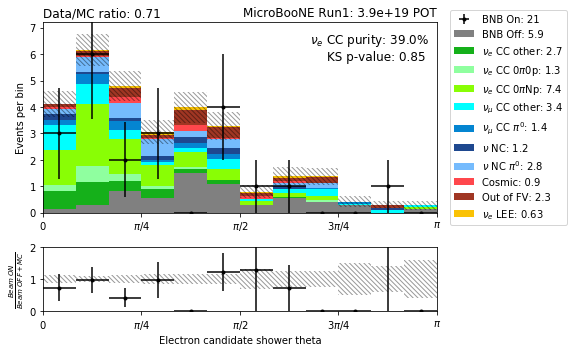

<IPython.core.display.Javascript object>

In [42]:
%%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(5 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio,purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "shr_tkfit_theta_v",
    "Electron candidate shower theta",
    N_bins=12,
    x_min=0,
    x_max=np.pi,
    query=q_s,
    legend=True,
    title_str=title_str,
    kind="event_category",
    y_max_scaler=1.2
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_labels)
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(x_labels)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_shower_theta.pdf", bbox_inches="tight")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.25 µs
MC category: $p$: 22.4 	#entries 397
MC category: $\mu$: 34.5 	#entries 603
MC category: $e$: 30.3 	#entries 533
MC category: $\pi^{\pm}$: 36.3 	#entries 644
MC category: $\gamma$: 613.1 	#entries 10869
MC category: $K$: 0.2 	#entries 3
MC category: Cosmic: 249.8 	#entries 4422


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 23.


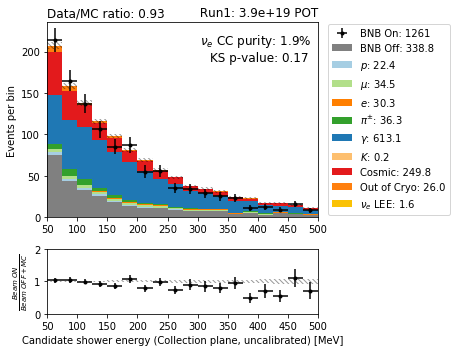

<IPython.core.display.Javascript object>

In [45]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "shr_energy_y_v",
    "Candidate shower energy (Collection plane, uncalibrated) [MeV]",
    N_bins=18,
    x_min=50,
    x_max=500,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.1,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shower_E_pdg.pdf", bbox_inches="tight")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
MC category: $\nu_e$ CC other: 11.1 	#entries 196
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 41
MC category: $\nu_e$ CC 0$\pi$Np: 12.9 	#entries 226
MC category: $\nu_{\mu}$ CC other: 202.5 	#entries 3581
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 423.2 	#entries 7503
MC category: $\nu$ NC: 32.3 	#entries 573
MC category: $\nu$ NC $\pi^{0}$: 163.9 	#entries 2905
MC category: Cosmic: 16.8 	#entries 297
MC category: Out of FV: 121.6 	#entries 2149


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 23.


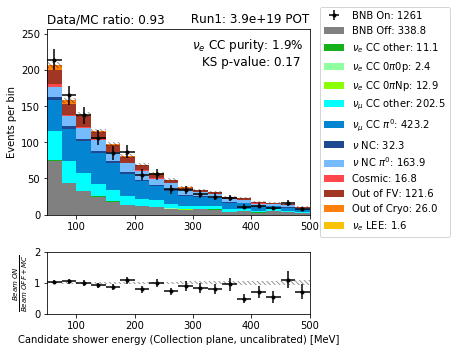

<IPython.core.display.Javascript object>

In [46]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "shr_energy_y_v",
    "Candidate shower energy (Collection plane, uncalibrated) [MeV]",
    N_bins=18,
    x_min=50,
    x_max=500,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shower_E.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 11.1 	#entries 196
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 41
MC category: $\nu_e$ CC 0$\pi$Np: 12.9 	#entries 226
MC category: $\nu_{\mu}$ CC other: 202.5 	#entries 3581
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 423.2 	#entries 7503
MC category: $\nu$ NC: 32.3 	#entries 573
MC category: $\nu$ NC $\pi^{0}$: 163.9 	#entries 2905
MC category: Cosmic: 16.8 	#entries 297
MC category: Out of FV: 121.6 	#entries 2149


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 25.
MC category: $\nu_e$ CC other: 11.1 	#entries 196
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 41
MC category: $\nu_e$ CC 0$\pi$Np: 12.9 	#entries 226
MC category: $\nu_{\mu}$ CC other: 202.5 	#entries 3581
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 423.2 	#entries 7503
MC category: $\nu$ NC: 32.3 	#entries 573
MC category: $\nu$ NC $\pi^{0}$: 163.9 	#entries 2905
MC category: Cosmic: 16.8 	#entries 297
MC category: Out of FV: 121.6 	#entries 2149
DRT: 24.
MC category: $\nu_e$ CC other: 11.1 	#entries 196
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 41
MC category: $\nu_e$ CC 0$\pi$Np: 12.9 	#entries 226
MC category: $\nu_{\mu}$ CC other: 202.5 	#entries 3581
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 423.2 	#entries 7503
MC category: $\nu$ NC: 32.3 	#entries 573
MC category: $\nu$ NC $\pi^{0}$: 163.9 	#entries 2905
MC category: Cosmic: 16.8 	#entries 297
MC category: Out of FV: 121.6 	#entries 2149
DRT: 26.


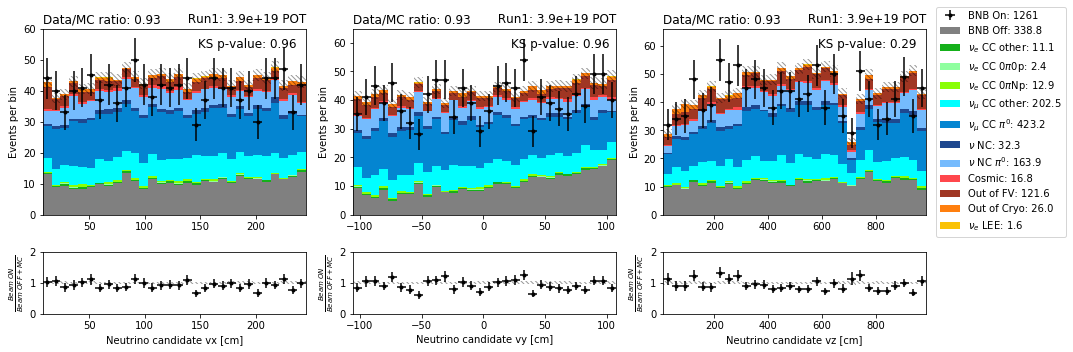

<IPython.core.display.Javascript object>

In [47]:
fig, ax = plt.subplots(
    ncols=3, nrows=2, figsize=(15, 5), gridspec_kw={"height_ratios": [3, 1]}
)


field_arr = ["reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z"]
lab_arr = [
    "Neutrino candidate vx [cm]",
    "Neutrino candidate vy [cm]",
    "Neutrino candidate vz [cm]",
]
x_min_arr = helper.lower + np.array([10, 10, 10])
x_max_arr = helper.upper - np.array([10, 10, 50])

for i, (x_min, x_max, lab, field) in enumerate(
    zip(x_min_arr, x_max_arr, lab_arr, field_arr)
):
    ratio, purity, ks_p = plothelp.plot_panel_data_mc(
        data,
        ax.T[i],
        field,
        lab,
        N_bins=30,
        x_min=x_min,
        x_max=x_max,
        query="e_candidate>0 & preselect",
        legend=(i == 2),
        title_str=title_str.split("NE")[-1],
        kind="event_category",
        y_max_scaler=1.2,
    )
    ax[0][i].text(
        ax[0][i].get_xlim()[1] * 0.98,
        ax[0][i].get_ylim()[1] * 0.9,
        "KS p-value: {0:<5.2f}".format(ks_p),
        horizontalalignment="right",
        fontsize=12,
    )

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_vtx.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 11.1 	#entries 196
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 41
MC category: $\nu_e$ CC 0$\pi$Np: 12.9 	#entries 226
MC category: $\nu_{\mu}$ CC other: 202.5 	#entries 3581
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 423.2 	#entries 7503
MC category: $\nu$ NC: 32.3 	#entries 573
MC category: $\nu$ NC $\pi^{0}$: 163.9 	#entries 2905
MC category: Cosmic: 16.8 	#entries 297
MC category: Out of FV: 121.6 	#entries 2149


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 26.
MC category: $\nu_e$ CC other: 11.1 	#entries 196
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 41
MC category: $\nu_e$ CC 0$\pi$Np: 12.9 	#entries 226
MC category: $\nu_{\mu}$ CC other: 202.5 	#entries 3581
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 423.2 	#entries 7503
MC category: $\nu$ NC: 32.3 	#entries 573
MC category: $\nu$ NC $\pi^{0}$: 163.9 	#entries 2905
MC category: Cosmic: 16.8 	#entries 297
MC category: Out of FV: 121.6 	#entries 2149
DRT: 26.


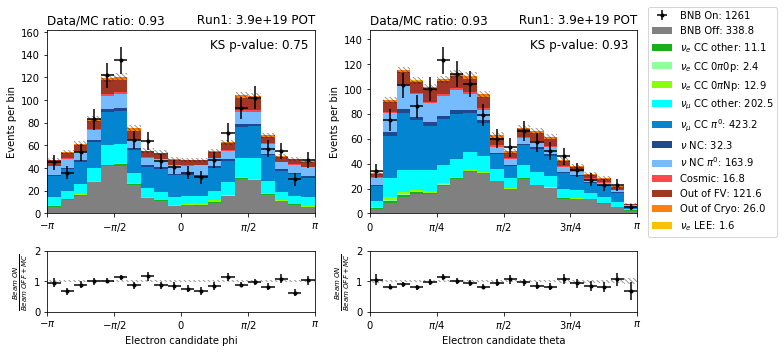

<IPython.core.display.Javascript object>

In [48]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[0],
    "shr_tkfit_phi_v",
    "Electron candidate phi",
    N_bins=20,
    x_min=-np.pi,
    x_max=np.pi,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
x_ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
x_labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
ax[1][0].set_xticks(x_ticks)
ax[1][0].set_xticklabels(x_labels)
ax[0][0].set_xticks(x_ticks)
ax[0][0].set_xticklabels(x_labels)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[1],
    "shr_tkfit_theta_v",
    "Electron candidate theta",
    N_bins=20,
    x_min=0,
    x_max=np.pi,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1][1].set_xticks(x_ticks)
ax[1][1].set_xticklabels(x_labels)
ax[0][1].set_xticks(x_ticks)
ax[0][1].set_xticklabels(x_labels)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_angles.pdf", bbox_inches="tight")

MC category: $p$: 22.4 	#entries 397
MC category: $\mu$: 34.5 	#entries 603
MC category: $e$: 30.3 	#entries 533
MC category: $\pi^{\pm}$: 36.3 	#entries 644
MC category: $\gamma$: 613.1 	#entries 10869
MC category: $K$: 0.2 	#entries 3
MC category: Cosmic: 249.8 	#entries 4422


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 18.
MC category: $p$: 22.4 	#entries 397
MC category: $\mu$: 34.5 	#entries 603
MC category: $e$: 30.3 	#entries 533
MC category: $\pi^{\pm}$: 36.3 	#entries 644
MC category: $\gamma$: 613.1 	#entries 10869
MC category: $K$: 0.2 	#entries 3
MC category: Cosmic: 249.8 	#entries 4422
DRT: 22.


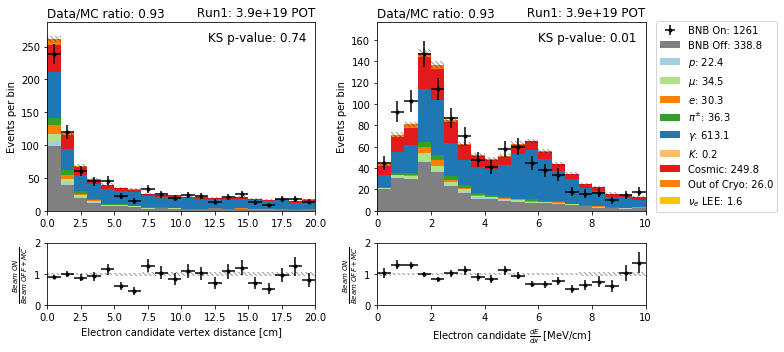

<IPython.core.display.Javascript object>

In [49]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[0],
    "shr_dist_v",
    "Electron candidate vertex distance [cm]",
    N_bins=20,
    x_min=0,
    x_max=20,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[1],
    "shr_tkfit_dedx_y_v",
    r"Electron candidate $\frac{dE}{dx}$ [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shwrfields.pdf", bbox_inches="tight")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs
MC category: $p$: 22.4 	#entries 397
MC category: $\mu$: 34.5 	#entries 603
MC category: $e$: 30.3 	#entries 533
MC category: $\pi^{\pm}$: 36.3 	#entries 644
MC category: $\gamma$: 613.1 	#entries 10869
MC category: $K$: 0.2 	#entries 3
MC category: Cosmic: 249.8 	#entries 4422


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 26.


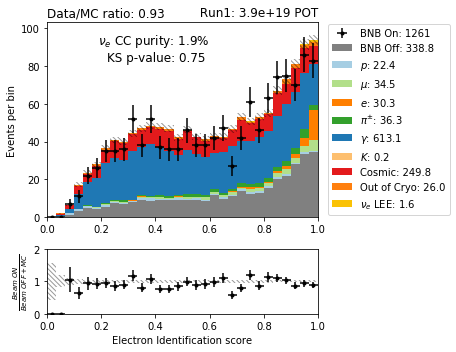

<IPython.core.display.Javascript object>

In [50]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "score",
    "Electron Identification score",
    N_bins=30,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.6,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_e_score.pdf", bbox_inches="tight")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
MC category: $p$: 706.4 	#entries 12523
MC category: $\mu$: 654.7 	#entries 11605
MC category: $e$: 27.0 	#entries 477
MC category: $\pi^{\pm}$: 221.5 	#entries 3926
MC category: $\gamma$: 678.1 	#entries 12019
MC category: $K$: 3.8 	#entries 67
MC category: Cosmic: 799.6 	#entries 14165


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 45.


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:268: RuntimeWarning: invalid value encountered in double_scalars
  sc_err = e / v
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:292: RuntimeWarning: invalid value encountered in true_divide
  bins[-1] / val,
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:294: RuntimeWarning: invalid value encountered in true_divide
  yerr=err_on / val,


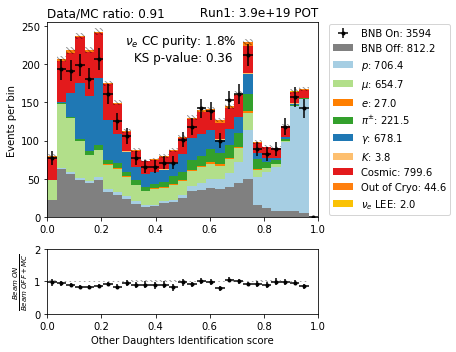

<IPython.core.display.Javascript object>

In [51]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "score",
    "Other Daughters Identification score",
    N_bins=29,
    x_min=0,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.7,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_daughter_score.pdf", bbox_inches="tight")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs
MC category: $\nu_e$ CC other: 11.1 	#entries 196
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 41
MC category: $\nu_e$ CC 0$\pi$Np: 12.9 	#entries 226
MC category: $\nu_{\mu}$ CC other: 202.5 	#entries 3581
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 423.2 	#entries 7503
MC category: $\nu$ NC: 32.3 	#entries 573
MC category: $\nu$ NC $\pi^{0}$: 163.9 	#entries 2905
MC category: Cosmic: 16.8 	#entries 297
MC category: Out of FV: 121.6 	#entries 2149


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 26.


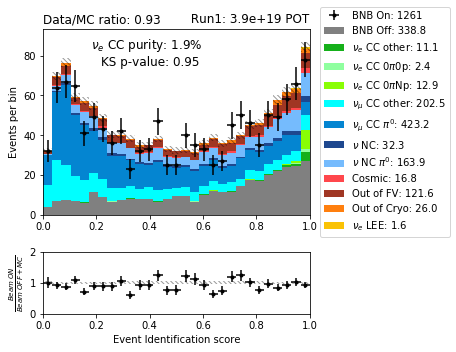

<IPython.core.display.Javascript object>

In [52]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "score_event",
    "Event Identification score",
    N_bins=29,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.6,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_event_score.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 2.7 	#entries 48
MC category: $\nu_e$ CC 0$\pi$0p: 1.3 	#entries 22
MC category: $\nu_e$ CC 0$\pi$Np: 7.4 	#entries 129
MC category: $\nu_{\mu}$ CC other: 3.4 	#entries 59
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 1.4 	#entries 25
MC category: $\nu$ NC: 1.2 	#entries 21
MC category: $\nu$ NC $\pi^{0}$: 2.8 	#entries 50
MC category: Cosmic: 0.9 	#entries 15
MC category: Out of FV: 2.3 	#entries 40


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 0.14
MC category: $\nu_e$ CC other: 2.7 	#entries 48
MC category: $\nu_e$ CC 0$\pi$0p: 1.3 	#entries 22
MC category: $\nu_e$ CC 0$\pi$Np: 7.4 	#entries 129
MC category: $\nu_{\mu}$ CC other: 3.4 	#entries 59
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 1.4 	#entries 25
MC category: $\nu$ NC: 1.2 	#entries 21
MC category: $\nu$ NC $\pi^{0}$: 2.8 	#entries 50
MC category: Cosmic: 0.9 	#entries 15
MC category: Out of FV: 2.3 	#entries 40
DRT: 0.14


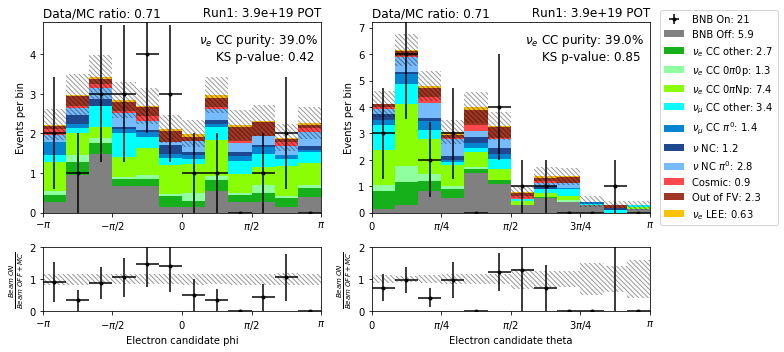

<IPython.core.display.Javascript object>

In [54]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[0],
    "shr_tkfit_phi_v",
    "Electron candidate phi",
    N_bins=12,
    x_min=-np.pi,
    x_max=np.pi,
    legend=False,
    query=q_s,
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
x_ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
x_labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
ax[1][0].set_xticks(x_ticks)
ax[1][0].set_xticklabels(x_labels)
ax[0][0].set_xticks(x_ticks)
ax[0][0].set_xticklabels(x_labels)

ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[1],
    "shr_tkfit_theta_v",
    "Electron candidate theta",
    N_bins=12,
    x_min=0,
    x_max=np.pi,
    legend=True,
    query=q_s,
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1][1].set_xticks(x_ticks)
ax[1][1].set_xticklabels(x_labels)
ax[0][1].set_xticks(x_ticks)
ax[0][1].set_xticklabels(x_labels)

ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/after_angles.pdf", bbox_inches="tight")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
MC category: $p$: 706.4 	#entries 12523
MC category: $\mu$: 654.7 	#entries 11605
MC category: $e$: 27.0 	#entries 477
MC category: $\pi^{\pm}$: 221.5 	#entries 3926
MC category: $\gamma$: 678.1 	#entries 12019
MC category: $K$: 3.8 	#entries 67
MC category: Cosmic: 799.6 	#entries 14165


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 43.


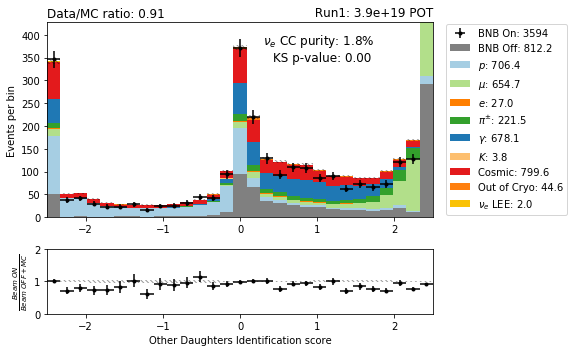

<IPython.core.display.Javascript object>

In [59]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(5 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "trk_llr_pid_score_v",
    "Other Daughters Identification score",
    N_bins=29,
    x_min=-2.5,
    x_max=2.5,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=0.45,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.7,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_daughter_nico_zoom.pdf", bbox_inches="tight")

MC category: $p$: 22.4 	#entries 397
MC category: $\mu$: 34.5 	#entries 603
MC category: $e$: 30.3 	#entries 533
MC category: $\pi^{\pm}$: 36.3 	#entries 644
MC category: $\gamma$: 613.1 	#entries 10869
MC category: $K$: 0.2 	#entries 3
MC category: Cosmic: 249.8 	#entries 4422


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 23.
MC category: $p$: 22.4 	#entries 397
MC category: $\mu$: 34.5 	#entries 603
MC category: $e$: 30.3 	#entries 533
MC category: $\pi^{\pm}$: 36.3 	#entries 644
MC category: $\gamma$: 613.1 	#entries 10869
MC category: $K$: 0.2 	#entries 3
MC category: Cosmic: 249.8 	#entries 4422
DRT: 20.


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:268: RuntimeWarning: invalid value encountered in double_scalars
  sc_err = e / v
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:292: RuntimeWarning: invalid value encountered in true_divide
  bins[-1] / val,
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:294: RuntimeWarning: invalid value encountered in true_divide
  yerr=err_on / val,


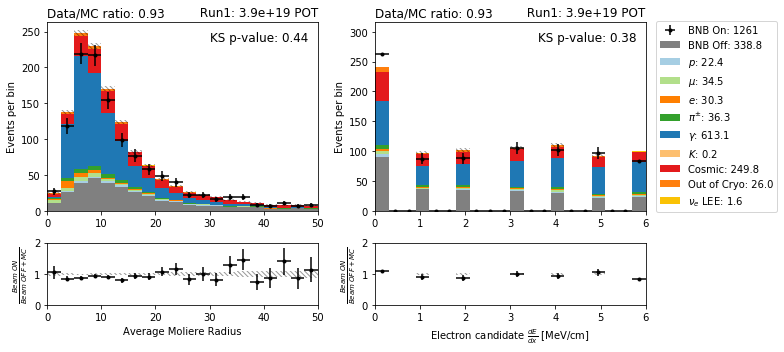

<IPython.core.display.Javascript object>

In [31]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[0],
    "shr_moliere_avg_v",
    "Average Moliere Radius",
    N_bins=20,
    x_min=0,
    x_max=50,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[1],
    "shr_tkfit_gap10_dedx_y_v",
    r"Electron candidate $\frac{dE}{dx}$ [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=6,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_moliere.pdf", bbox_inches="tight")

MC category: $p$: 22.4 	#entries 397
MC category: $\mu$: 34.5 	#entries 603
MC category: $e$: 30.3 	#entries 533
MC category: $\pi^{\pm}$: 36.3 	#entries 644
MC category: $\gamma$: 613.1 	#entries 10869
MC category: $K$: 0.2 	#entries 3
MC category: Cosmic: 249.8 	#entries 4422


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 26.
MC category: $p$: 22.4 	#entries 397
MC category: $\mu$: 34.5 	#entries 603
MC category: $e$: 30.3 	#entries 533
MC category: $\pi^{\pm}$: 36.3 	#entries 644
MC category: $\gamma$: 613.1 	#entries 10869
MC category: $K$: 0.2 	#entries 3
MC category: Cosmic: 249.8 	#entries 4422
DRT: 16.


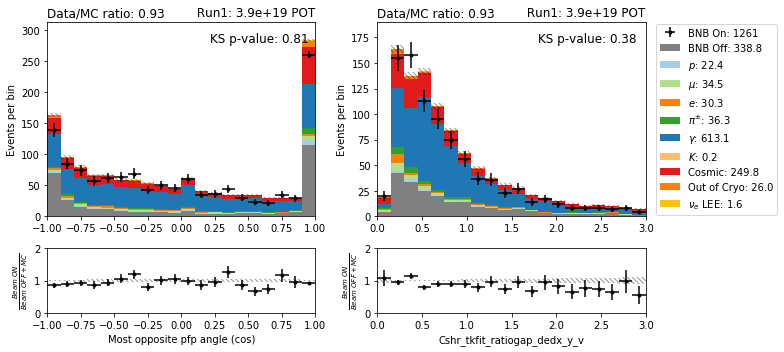

<IPython.core.display.Javascript object>

In [32]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[0],
    "trk_min_cos",
    "Most opposite pfp angle (cos)",
    N_bins=20,
    x_min=-1,
    x_max=1,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[1],
    "shr_tkfit_ratiogap_dedx_y_v",
    r"shr_tkfit_ratiogap_dedx_y_v",
    N_bins=20,
    x_min=0,
    x_max=3,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_clustershwr.pdf", bbox_inches="tight")

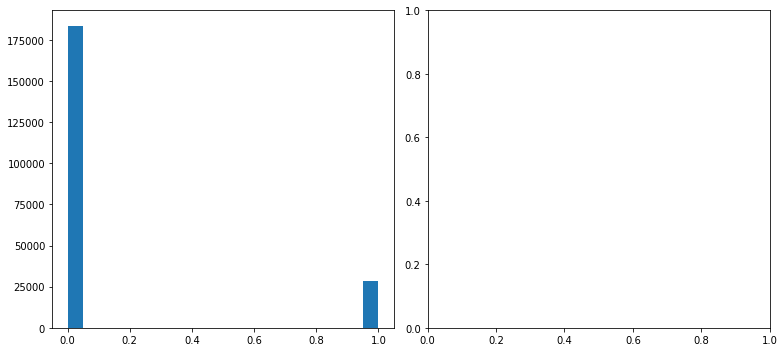

<IPython.core.display.Javascript object>

In [33]:
### PLOT the containment!
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(11, 5))

plot_data = [
    data["off"]["daughters"]["contained_sps_ratio"],
    data["off"]["daughters"]["contained_fraction"],
    data["nue"]["daughters"].query("e_candidate>0 & preselect")["contained_sps_ratio"],
    data["nue"]["daughters"].query("e_candidate>0 & preselect")["contained_fraction"],
]
ax[0].hist(plot_data[0], bins=20)

fig.tight_layout()

In [34]:
data["nue"]["daughters"].query("e_candidate>0 & preselect")[
    "shr_openangle_v"
].describe()

count    3.681500e+04
mean              NaN
std               inf
min     -2.232918e+38
25%     -2.948433e+00
50%      7.042213e-38
75%      1.332257e-01
max      3.045506e+38
Name: shr_openangle_v, dtype: float64

<IPython.core.display.Javascript object>